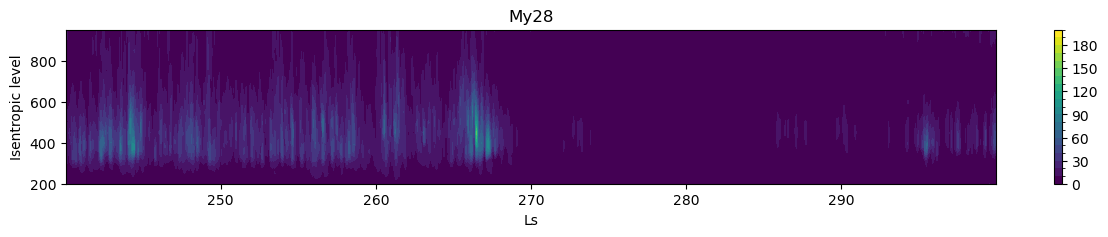

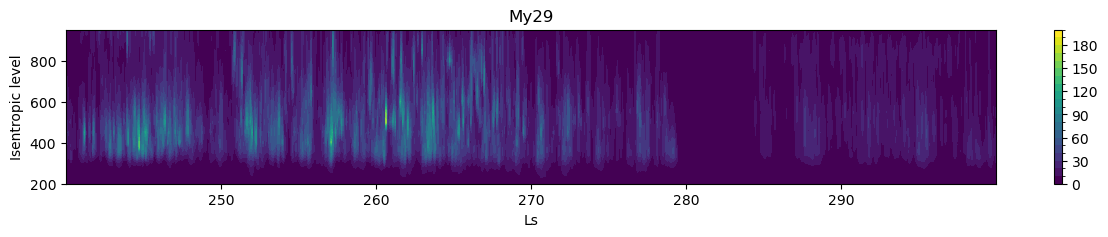

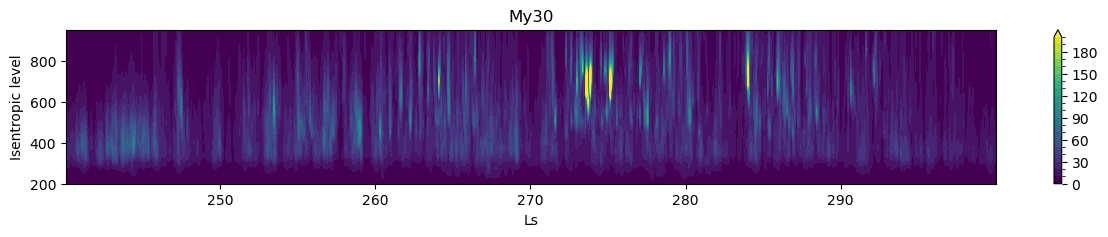

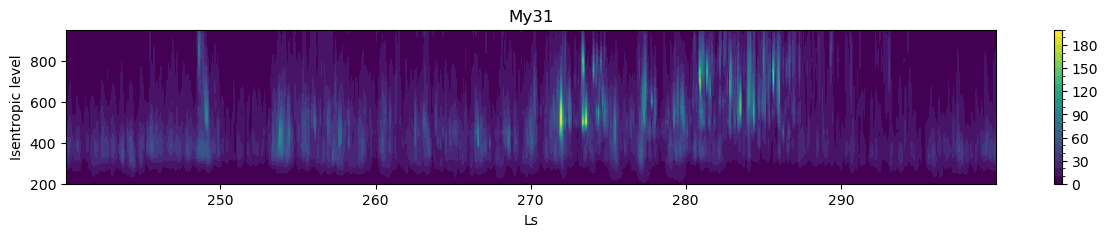

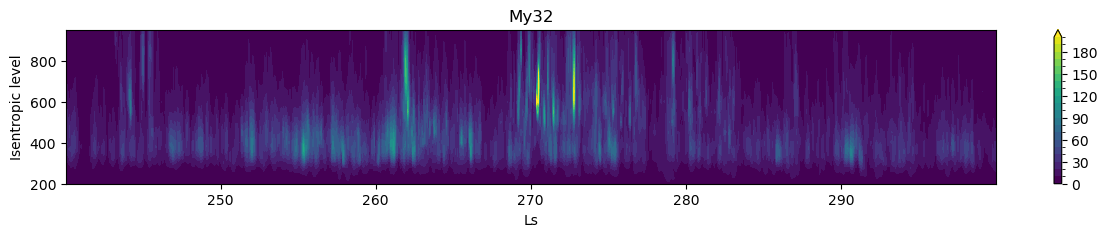

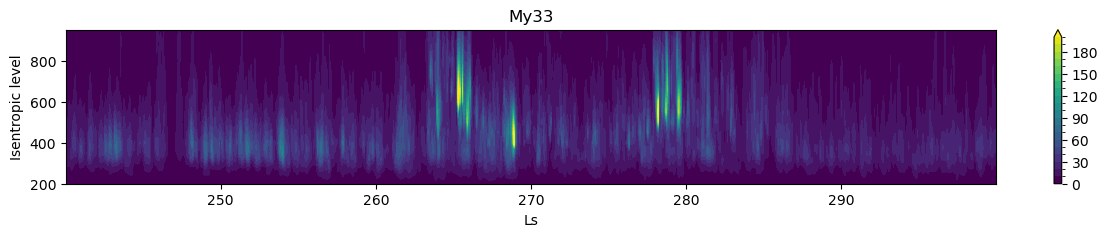

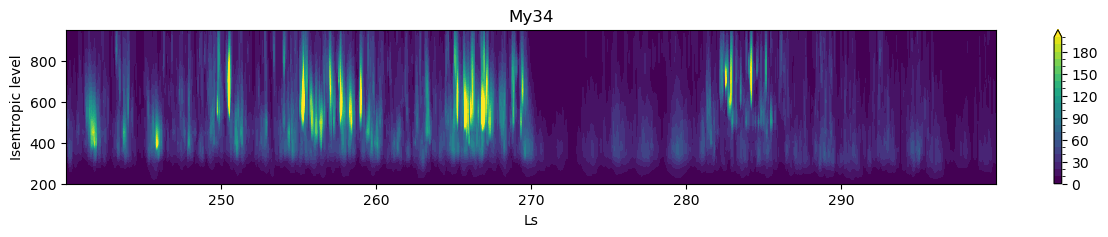

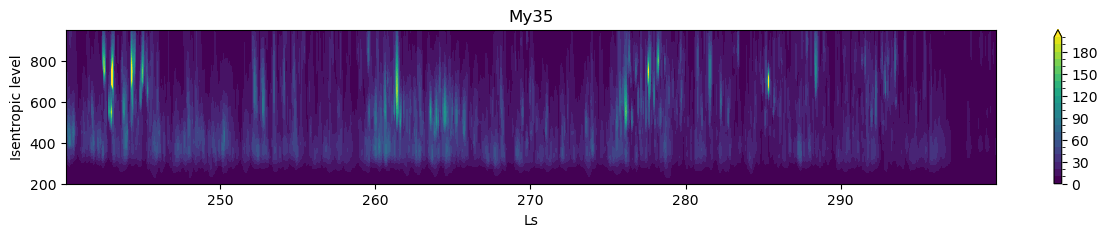

In [60]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

islev = 000

years = [28, 29, 30, 31, 32, 33, 34, 35]
path = '/disco/share/sh1293/OpenMARS_data/Eddy_enstrophy/'
i = 0
for year in years:
    da = xr.open_dataarray(path + 'lev%03d_my%02d.nc' %(islev, year))
    da = da.assign_coords({'MY':year})
    daw = da.where(240 <= da.Ls, drop = True).where(da.Ls <= 300, drop = True)
    plt.figure(figsize = (15, 2))
    daw.plot.contourf(x='Ls', levels = 21, vmin = 0, vmax = 200)
    plt.xlabel('Ls')
    plt.ylabel('Isentropic level')
    plt.title('My%02d' %(year))
    plt.savefig(path + '/Plots/isen_my%02d.pdf' %(year))
    #if i == 0:
    #    d = da
    #else:
    #    d = xr.concat([d, da], dim = 'time')
    #i+=1

#plt.figure(figsize = (24, 8))
#X, Y = np.meshgrid(d.time, d.level)
#plt.scatter(X, Y, c = d.values, cmap = 'RdBu_r', marker = 'x')
#plt.savefig(path + '/Plots/plot.pdf')

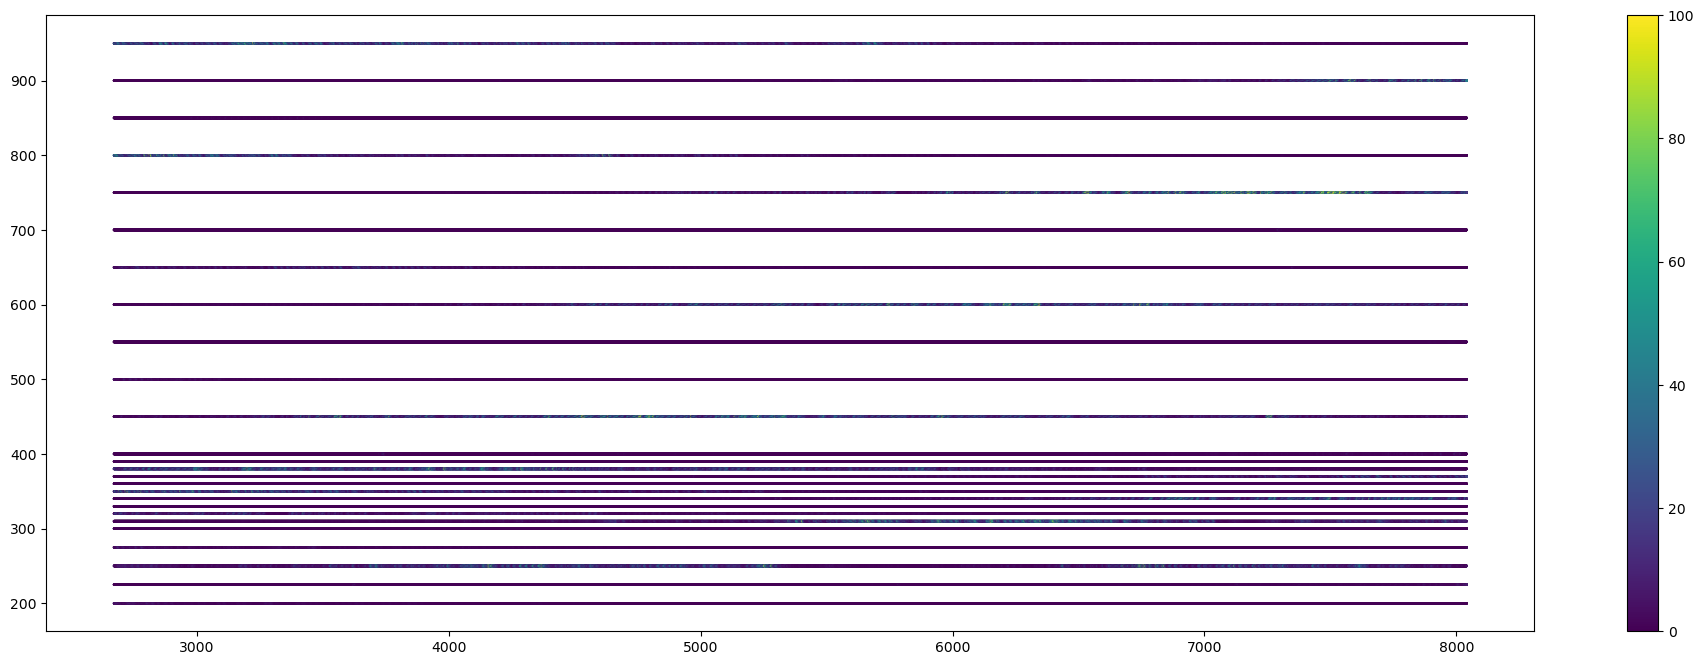

In [27]:
plt.figure(figsize = (24,8))
plt.scatter(X, Y, c = d.values, cmap = 'viridis', marker = 'o', s = 0.5, vmin = 0, vmax = 100)
plt.colorbar()

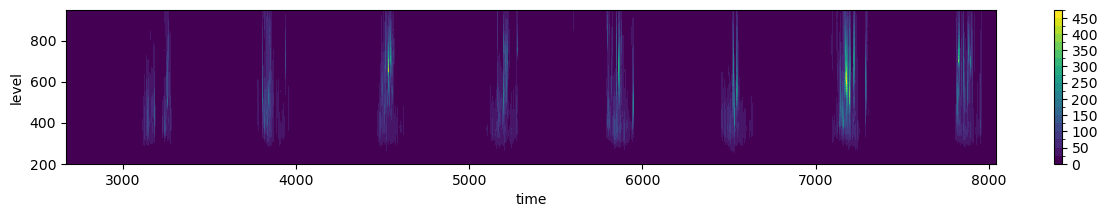

In [24]:
plt.figure(figsize = (15, 2))
d.plot.contourf(x='time', levels = 21)

In [57]:
d36 = d.where(d.MY == 36, drop = True).where(240 <= d.Ls, drop = True).where(d.Ls <= 300, drop = True)

In [58]:
d36

<xarray.DataArray (time: 0, level: 26)>
array([], shape=(0, 26), dtype=float64)
Coordinates:
  * time     (time) float32 
  * level    (level) float64 200.0 225.0 250.0 275.0 ... 800.0 850.0 900.0 950.0
    Ls       (time) float32 
    MY       (time) int64

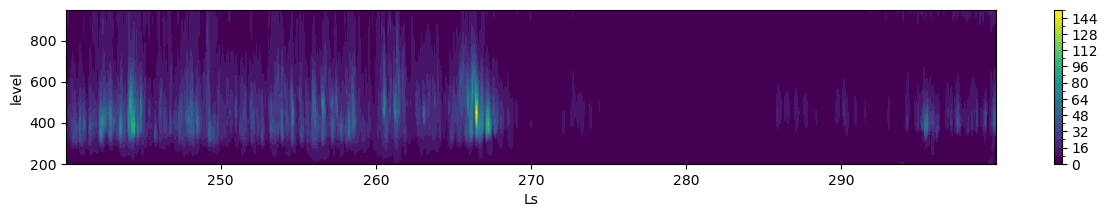

In [52]:
plt.figure(figsize = (15, 2))
d28.plot.contourf(x='Ls', levels = 21)